In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [223]:
data=pd.read_csv(r'D:\Wholesale customers data.csv')

In [224]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [225]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [226]:
data.Channel.nunique()

2

In [227]:
data=data.drop('Channel',axis=1)

In [228]:
data.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Company xy wants to introduce premium membership for users with higher milk consumption /  we need to find people having higher usage of milk consumption in each area

In [229]:
data2=data.iloc[:,[0,2]].values

### Hierarchial clustering

#### Agglomerative method

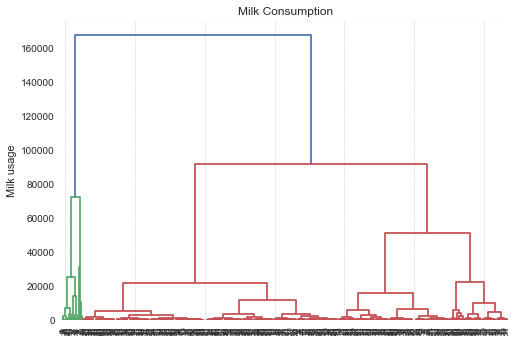

In [230]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(data2,method='ward'))
plt.title("Milk Consumption")
plt.ylabel('Milk usage')
plt.show()

In [231]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data2)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

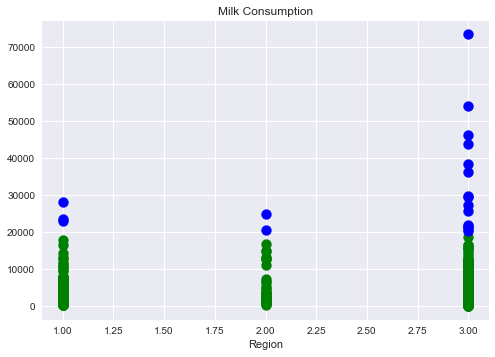

In [232]:
plt.scatter(data2[y_hc==0,0],data2[y_hc==0,1],s=100,c='green',label='cluster 1')
plt.scatter(data2[y_hc==1,0],data2[y_hc==1,1],s=100,c='blue',label='cluster 2')
plt.title("Milk Consumption")
plt.xlabel('Region')
plt.show()

#### K-means clustering

1 Clusters : 23912315881.068188
2 Clusters : 9849559654.425837
3 Clusters : 5043717761.917744
4 Clusters : 2771650007.296701
5 Clusters : 1815016353.7402852
6 Clusters : 1162376616.0093465
7 Clusters : 839661638.2218554
8 Clusters : 643058885.597976
9 Clusters : 505313786.3924672
10 Clusters : 382623822.9174671


Text(0, 0.5, 'Inertia or SSE')

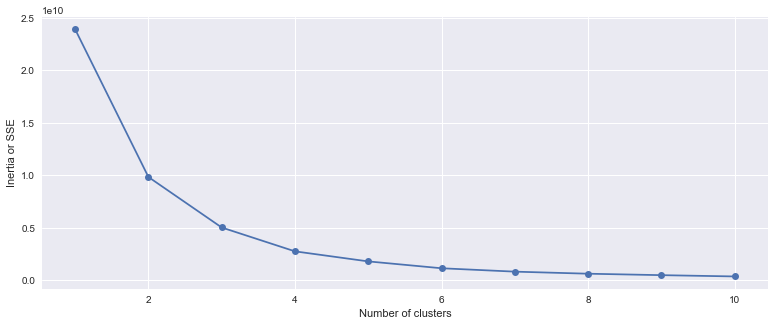

In [233]:
from sklearn.cluster import KMeans
clusters = range(1, 11)
wcss = []
for cluster in clusters:
    model = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    model.fit(data2)
    wcss.append(model.inertia_)
    print(cluster, "Clusters :", model.inertia_)

plt.style.use("seaborn")
plt.subplots(figsize=(13, 5))
plt.plot(clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')

In [234]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.8090698214077627
For n_clusters = 3 The average silhouette_score is : 0.6887420692556643
For n_clusters = 4 The average silhouette_score is : 0.6382706998695304
For n_clusters = 5 The average silhouette_score is : 0.6188100307537744
For n_clusters = 6 The average silhouette_score is : 0.6202742731626839
For n_clusters = 7 The average silhouette_score is : 0.5992746492972055
For n_clusters = 8 The average silhouette_score is : 0.603326645431724
For n_clusters = 9 The average silhouette_score is : 0.6056376069894122
For n_clusters = 10 The average silhouette_score is : 0.6091134854501589


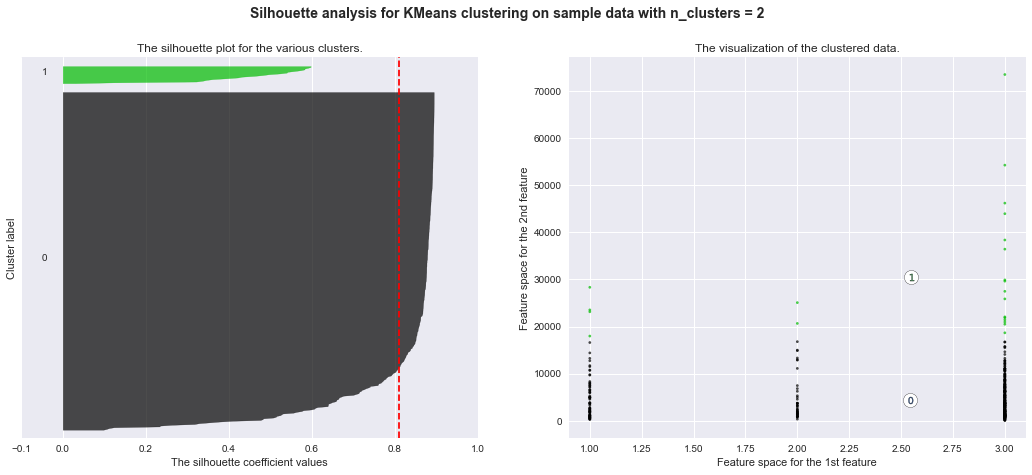

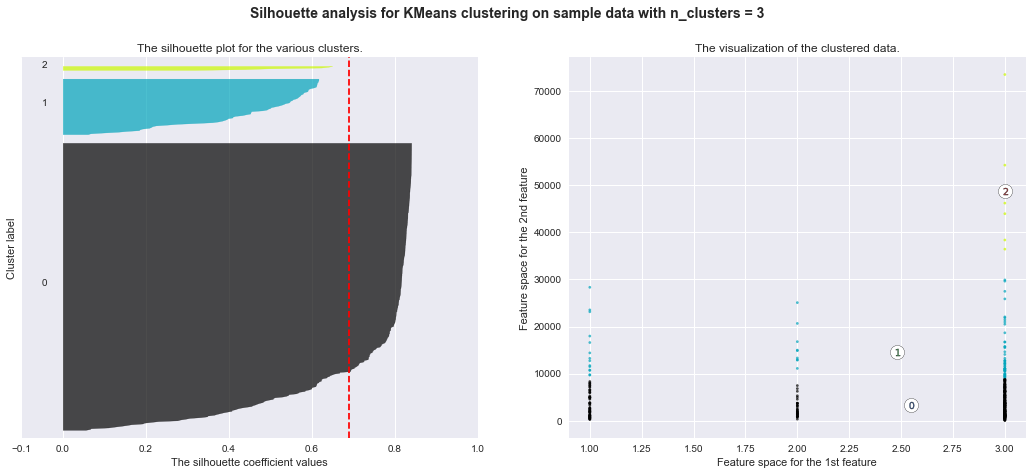

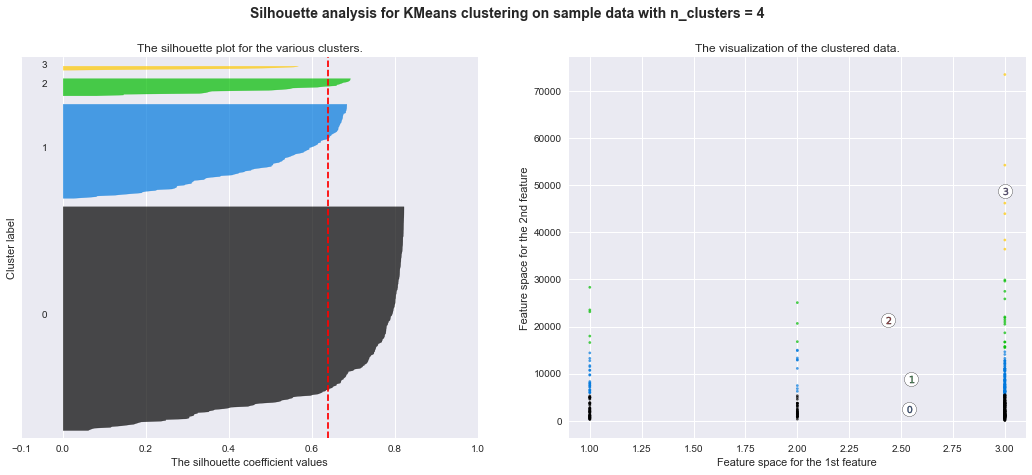

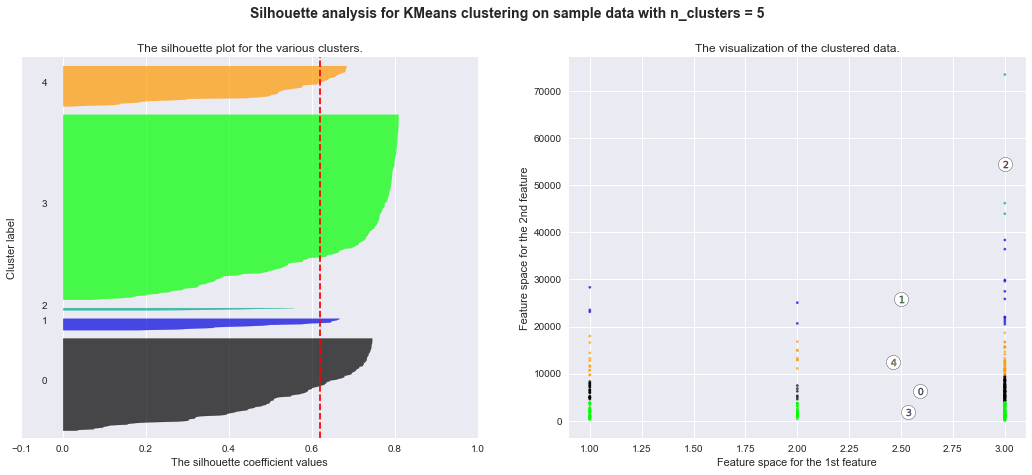

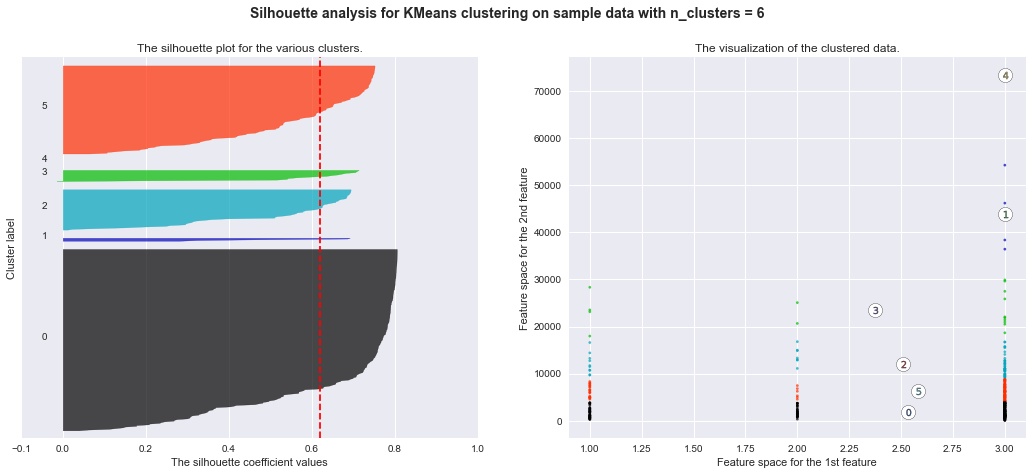

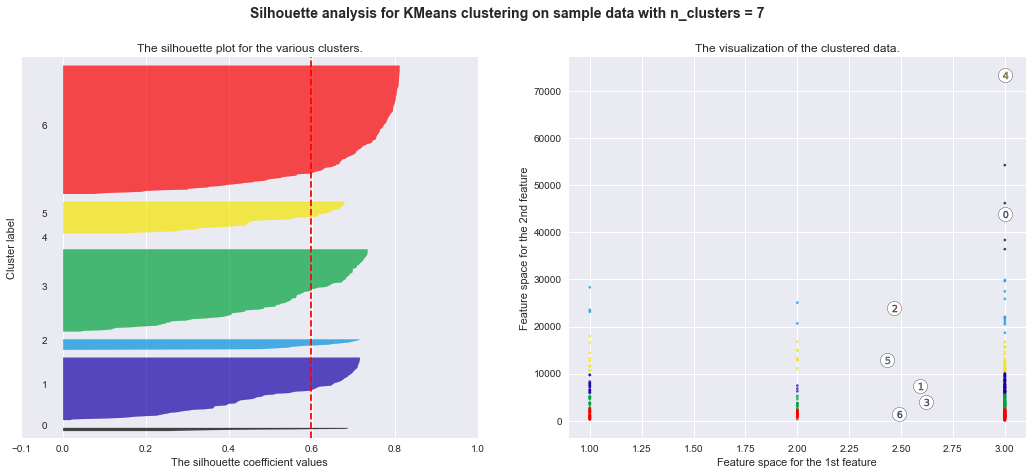

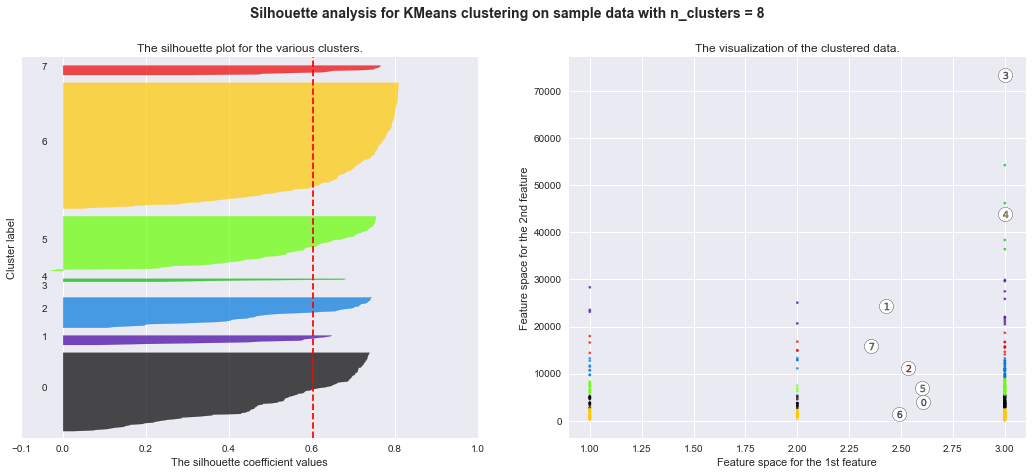

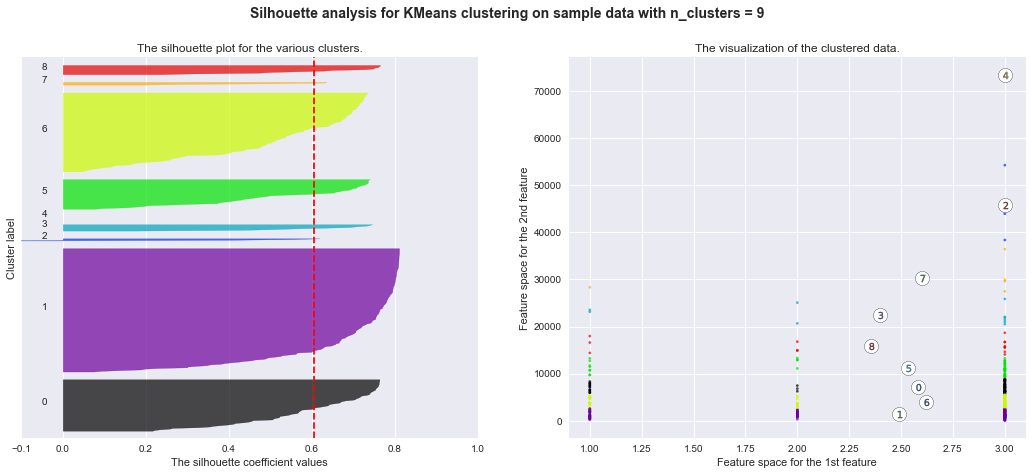

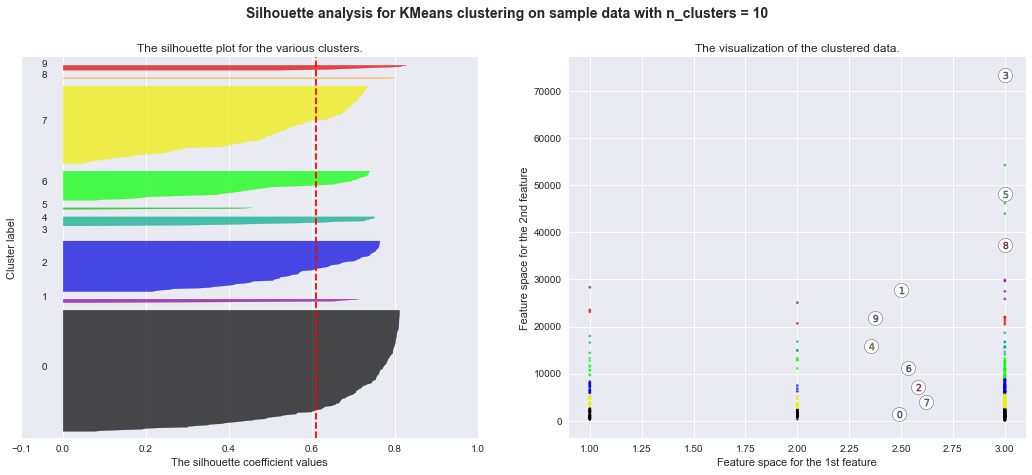

In [235]:
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(data2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data2[:, 0], data2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [236]:
model = KMeans(n_clusters=2)
y_kmeans = model.fit_predict(data2)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


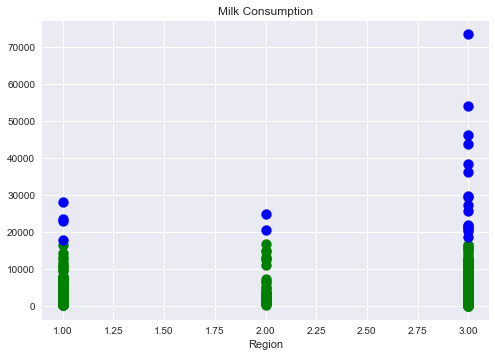

In [237]:
plt.scatter(data2[y_kmeans==0,0],data2[y_kmeans==0,1],s=100,c='green',label='cluster 1')
plt.scatter(data2[y_kmeans==1,0],data2[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.title("Milk Consumption")
plt.xlabel('Region')
plt.show()

Blue indicating people in each regions have higher consumption of milk 

###### Considering in general :

#### PCA

In [238]:
z=data.drop('Region',axis=1)
x=pd.DataFrame(data.iloc[:,1:].values,columns=z.columns)
y=pd.DataFrame(data.iloc[:,[0]].values,columns=['Region'])

In [239]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=z.columns)

In [240]:
data3=pd.concat([x,y],axis=1)

In [241]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(data3)
x_pca=pca.transform(data3)

In [242]:
pca.explained_variance_ratio_

array([0.40091742, 0.2581786 , 0.11253836])

In [243]:
x_pca.shape

(440, 3)

In [244]:
data3.shape

(440, 7)

In [245]:
x_pca

array([[ 0.19914443, -0.29131544, -0.21870632],
       [ 0.44010065, -0.31541775,  0.24743288],
       [ 0.81739909,  0.82774336,  1.41225317],
       ...,
       [ 3.4708681 , -1.02875727, -0.76370639],
       [-0.91201922, -0.01574331,  0.17579931],
       [-1.09958445, -0.84699114,  0.23111469]])

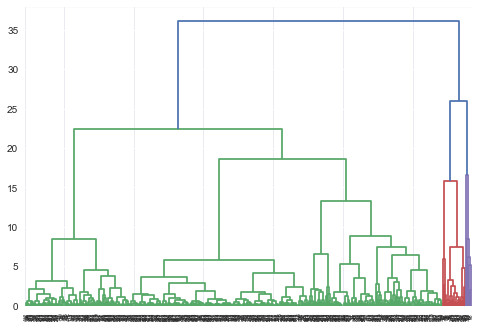

In [246]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x_pca,method='ward'))
plt.show()

In [247]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

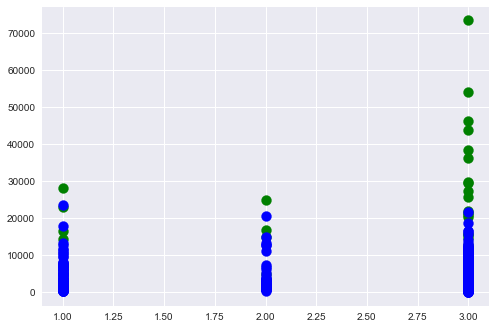

In [248]:
plt.scatter(data2[y_hc==0,0],data2[y_hc==0,1],s=100,c='green',label='cluster 1')
plt.scatter(data2[y_hc==1,0],data2[y_hc==1,1],s=100,c='blue',label='cluster 2')
plt.show()

In [253]:
pd.DataFrame(pca.components_,columns=data3.columns,index=['pc1','pc2','pc3'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
pc1,0.043269,0.545155,0.579121,0.051219,0.548443,0.248951,0.012775
pc2,0.528377,0.082871,-0.146586,0.610035,-0.255728,0.504080,0.028751
pc3,-0.809701,0.056742,-0.102879,0.204728,-0.128698,0.504085,-0.134170
